# Exploring Predicting Car Prices Data Insights  ML

### Dataset Information: **Car Price Prediction Challenge**

The dataset contains 19,237 rows and 18 columns, including both features and the target variable (Price). It is designed for a regression problem, where the goal is to predict the price of cars based on various characteristics. Here's a breakdown of the attributes:

#### **Attributes:**
1. **ID**: Unique identifier for each car.
2. **Price**: The price of the car (target column).
3. **Levy**: A levy (additional tax or fee) that may affect the car's price 
4. **Manufacturer**: The brand or make of the car (e.g., LEXUS, HONDA, FORD).
5. **Model**: The model name of the car.
6. **Prod. Year**: The year the car was manufactured.
7. **Category**: The type of car (e.g., Jeep, Hatchback, Sedan).
8. **Leather Interior**: Indicates whether the car has leather interior (`Yes` or `No`).
9. **Fuel Type**: The type of fuel the car uses (e.g., Petrol, Hybrid, Diesel).
10. **Engine Volume**: The volume of the car's engine in liters (e.g., 3.5, 2.0).
11. **Mileage**: The total distance the car has traveled (recorded in kilometers).
12. **Cylinders**: The number of cylinders in the engine.
13. **Gear Box Type**: The type of transmission (e.g., Automatic, Tiptronic, Variator).
14. **Drive Wheels**: The car's drivetrain system (e.g., 4x4, Front, Rear).
15. **Doors**: The number of doors on the car (commonly 2, 4, or 5).
16. **Wheel**: Whether the car is left or right-hand drive.
17. **Color**: The exterior color of the car.
18. **Airbags**: The number of airbags installed in the car.

#### **Key Insights**:
- **Target Variable**: `Price` is the dependent variable to be predicted.
- **Categorical & Numeric Variables**: Features such as `Manufacturer`, `Category`, and `Fuel Type` are categorical, while `Engine Volume`, `Mileage`, and `Price` are numeric.


In [103]:
#import paskages 
import pandas as pd
import numpy as np
import datetime


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
sns.set(style="whitegrid")


### Explore Datasets

In [3]:
#read dataset
df_price=pd.read_csv("datasets/car_price_prediction.csv")

In [4]:
#head dataset
df_price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
#last  dataset
df_price.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [6]:
#shape of dataset 
df_price.shape

(19237, 18)

In [7]:
#information about dataset
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
# Summary statistic
df_price.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [9]:
# Summary statistic for categrical columns 
df_price.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [10]:
# Check for duplicated data values
df_price.duplicated().sum()

313

In [11]:
#drop duplicates values 
df_price.drop_duplicates(inplace=True)

In [12]:
# Check for missing values
df_price.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

###### find unique values in each  column object

In [13]:
# Select object-type columns
object_columns = df_price.select_dtypes(include="object").columns

In [14]:
for column in object_columns:
    unique_val = df_price[column].unique()
    print(f"column : {column} \ntotal length : {len(unique_val)}" )
    print(unique_val[:10])
    print("")
    print("*"*30)
    print("")


column : Levy 
total length : 559
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053']

******************************

column : Manufacturer 
total length : 65
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW']

******************************

column : Model 
total length : 1590
['RX 450' 'Equinox' 'FIT' 'Escape' 'Santa FE' 'Prius' 'Sonata' 'Camry'
 'RX 350' 'E 350']

******************************

column : Category 
total length : 11
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine']

******************************

column : Leather interior 
total length : 2
['Yes' 'No']

******************************

column : Fuel type 
total length : 7
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

******************************

column : Engine volume 
total length : 107
['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3']

******************************

c

###### hist plot simple for numrical features 

In [15]:
# Select numerical columns
numerical_columns = df_price.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_columns.remove("ID") # and delet name column "ID"
numerical_columns

['Price', 'Prod. year', 'Cylinders', 'Airbags']

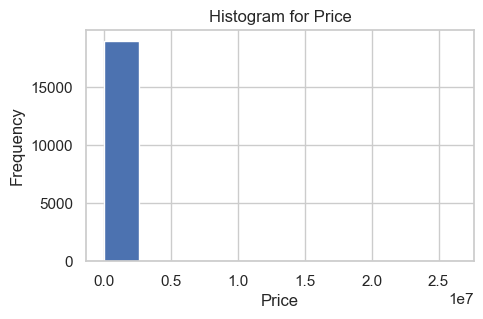

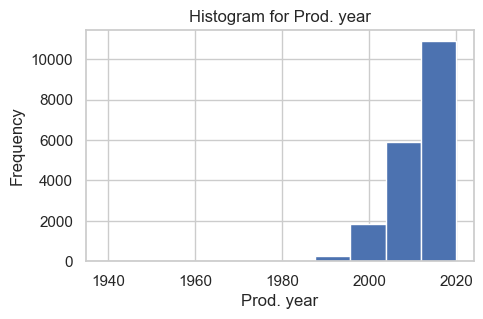

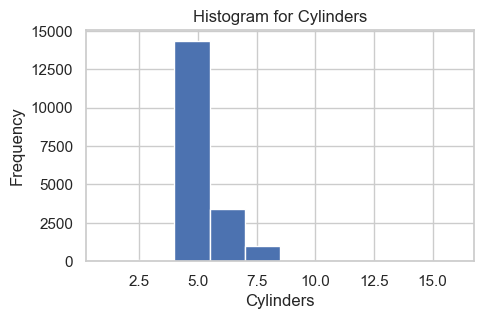

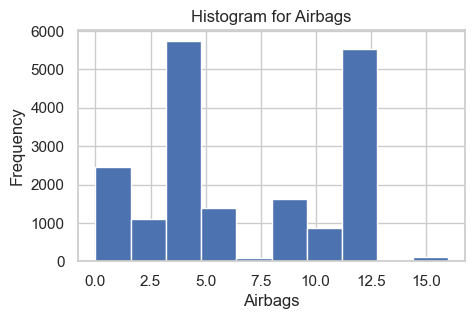

In [16]:
# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(5,3))
    plt.hist(df_price[col])  
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [17]:

# Get  top 5 manufacturers by count
top5cars=df_price['Manufacturer'].value_counts().sort_values(ascending=False)[:5]

top5cars


HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
Name: Manufacturer, dtype: int64

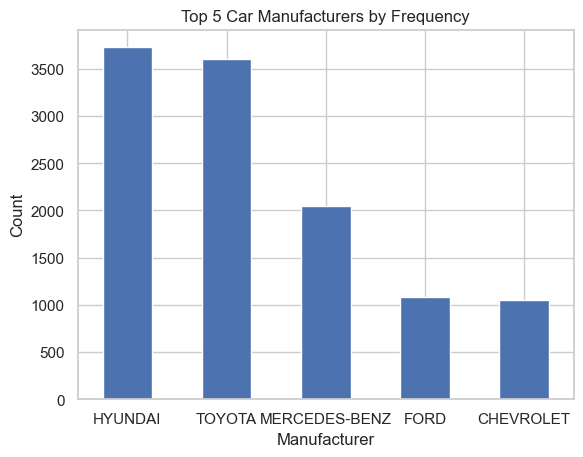

In [18]:
# Plotting  top 5 manufacturers

top5cars.plot(kind='bar')

plt.title("Top 5 Car Manufacturers by Frequency")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=0)  #
plt.show()

In [19]:
#get average each car from top5car Manufacturer
avg_top5_car=[]
for i in top5cars.index:
    price_car=df_price[df_price['Manufacturer']==i]['Price'].mean()
    avg_top5_car.append(price_car)
    print(f"{i} : {price_car}")


HYUNDAI : 22306.00080450523
TOYOTA : 14302.447864669994
MERCEDES-BENZ : 18590.331375428294
FORD : 15411.85018382353
CHEVROLET : 14894.873925501433


Text(0, 0.5, 'Average Price')

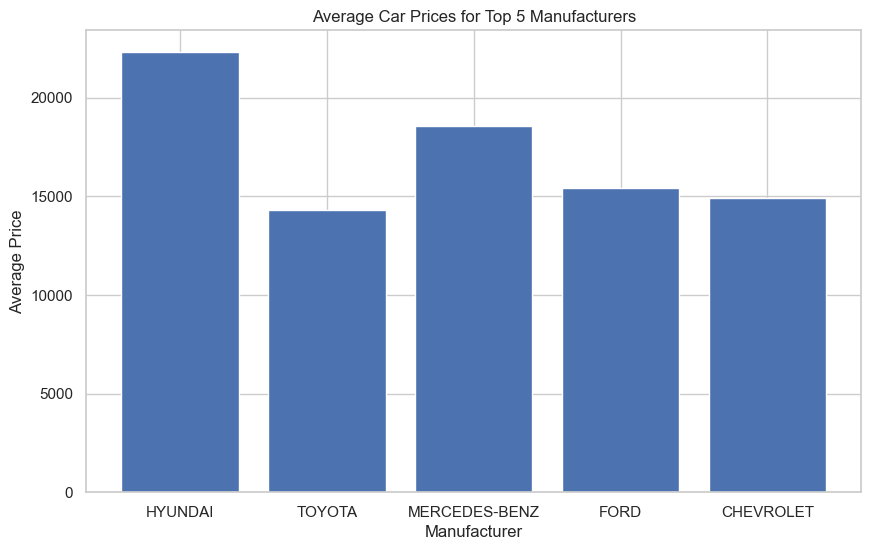

In [20]:
# Plotting  average prices

plt.figure(figsize=(10, 6))
plt.bar(top5cars.index ,avg_top5_car)
plt.title("Average Car Prices for Top 5 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Average Price")

In [21]:
#drop it columns "Id"
df_price.drop(['ID'],axis=1,inplace=True)

In [22]:
#correlation dataset 
corr_data= df_price.corr()
corr_data

,Price,Prod. year,Cylinders,Airbags
Price,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.012689,1.000000,-0.099443,0.235160
Cylinders,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.012709,0.235160,0.174112,1.000000


In [23]:
#get correlation for target 'Price'
corr_price=df_price.corr().drop(['Price'])['Price']
corr_price

Prod. year    0.012689
Cylinders     0.007435
Airbags      -0.012709
Name: Price, dtype: float64

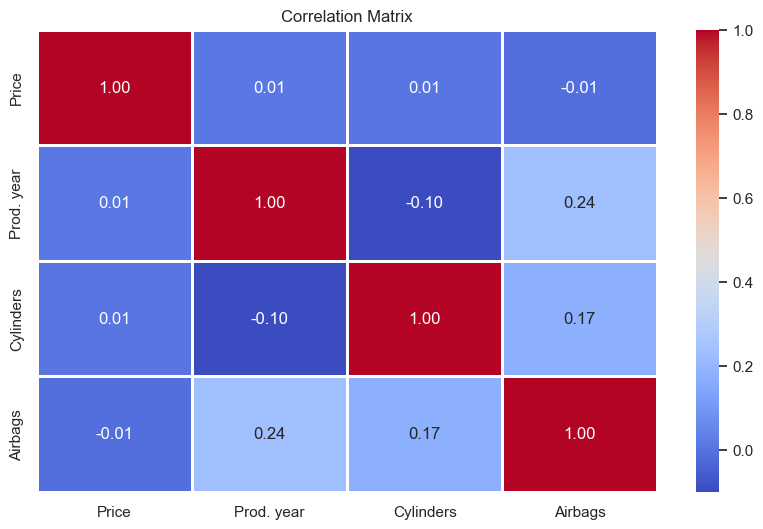

In [24]:
#visalizatoin for correlation data 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data , annot=True ,cmap='coolwarm', fmt=".2f" , linewidths='2')
plt.title('Correlation Matrix')
plt.show()


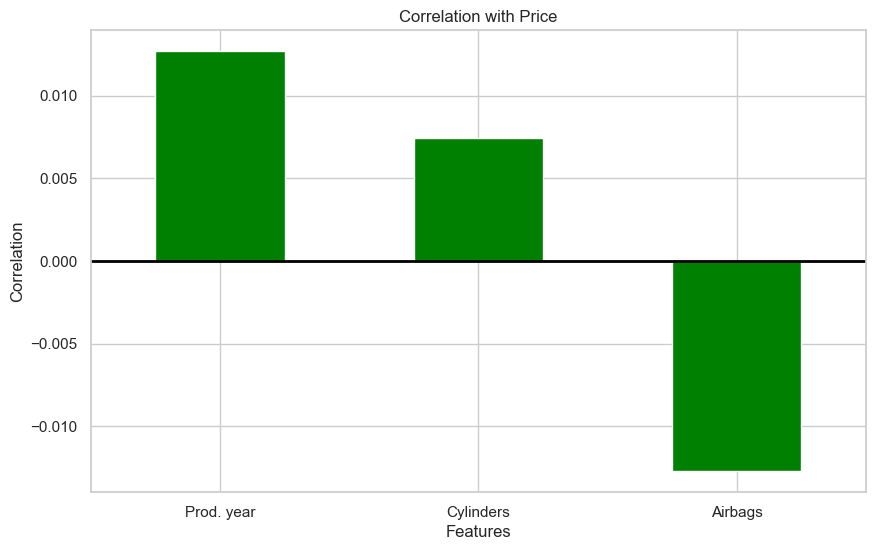

In [25]:
# Plot  correlation  features with 'Price'
plt.figure(figsize=(10, 6))
corr_price.plot(kind="bar", color='green')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.axhline(0 , color='black' , linewidth=2)
plt.xticks(rotation=0)
plt.show()

###### visualization of  top 10 values for categorical columns

In [26]:
#get features type of "object"
data_object=df_price.select_dtypes(include='object').columns
data_object

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [27]:
# colors for each bar
cmap = plt.get_cmap('viridis') 

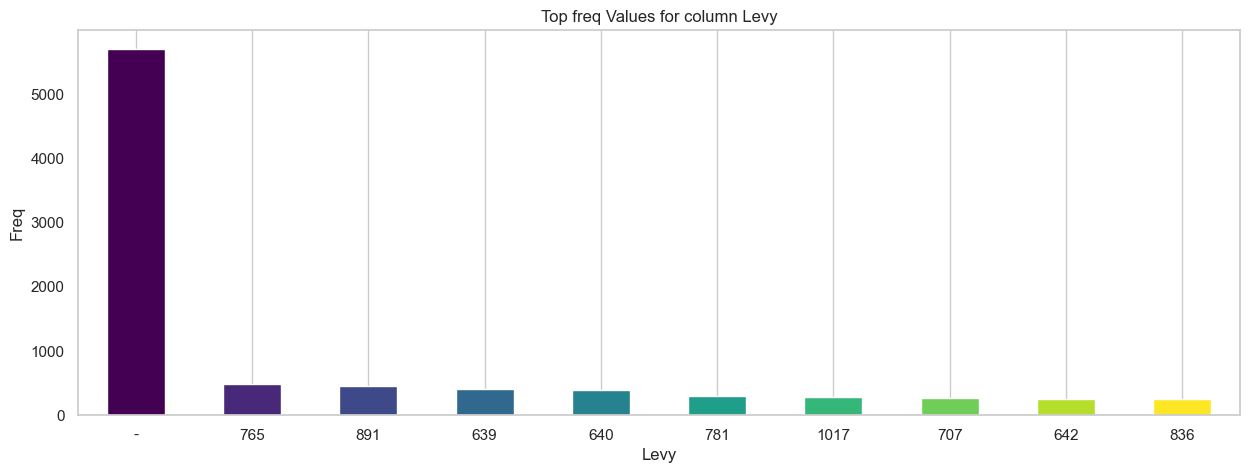

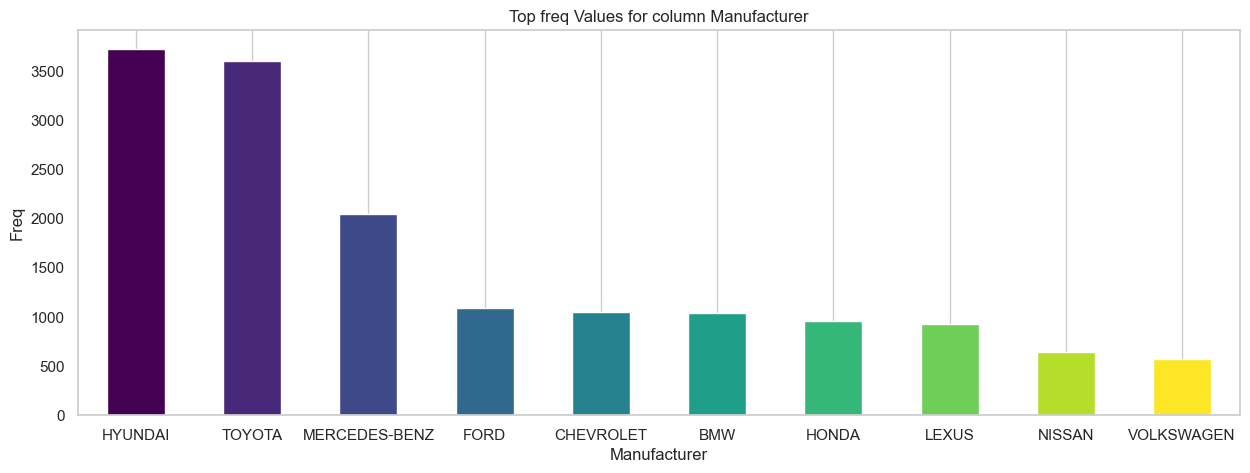

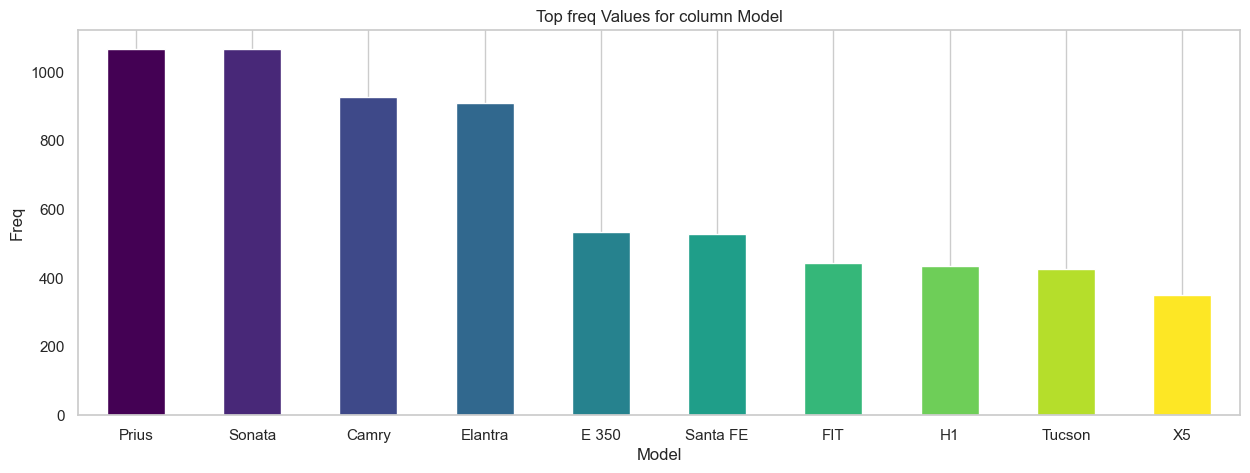

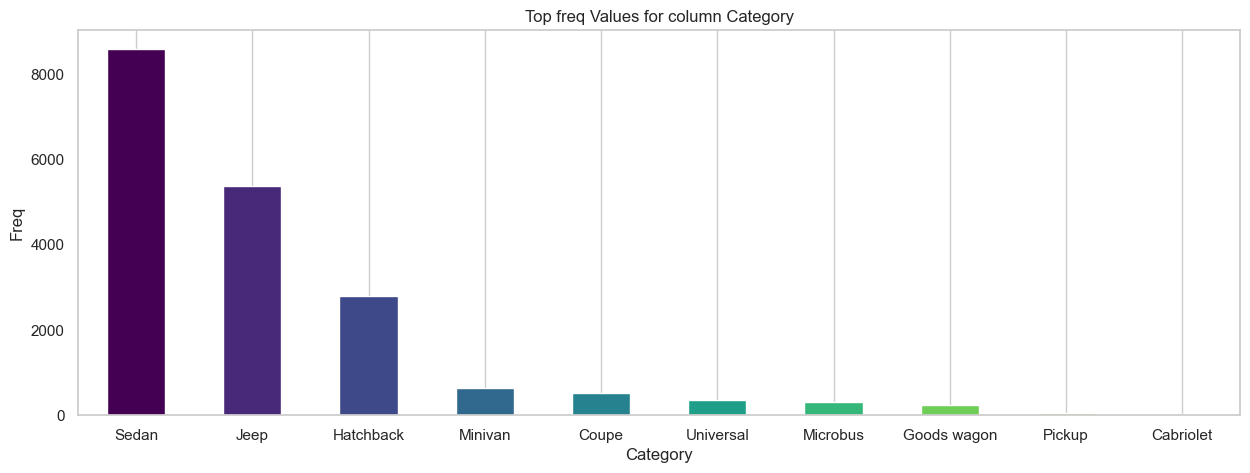

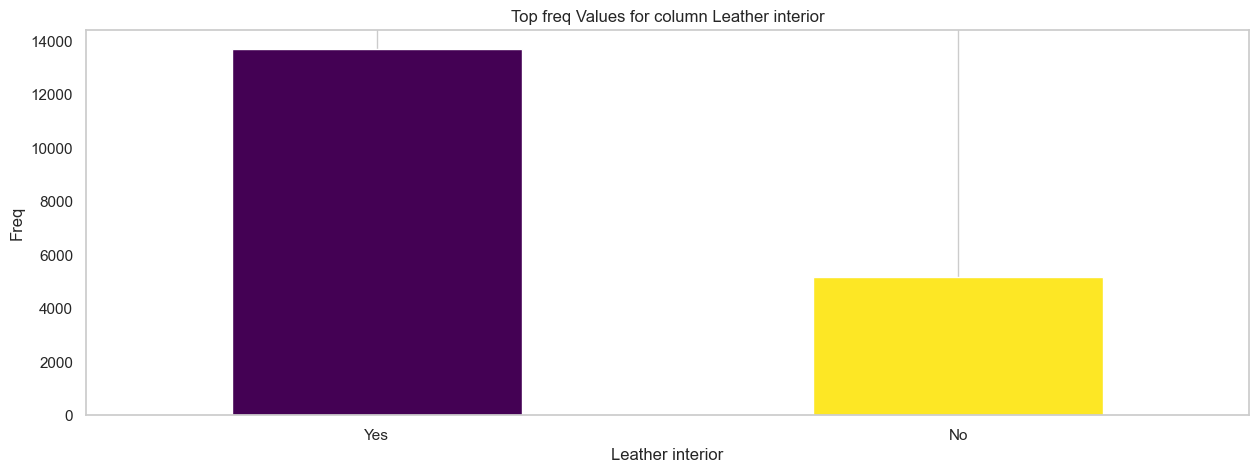

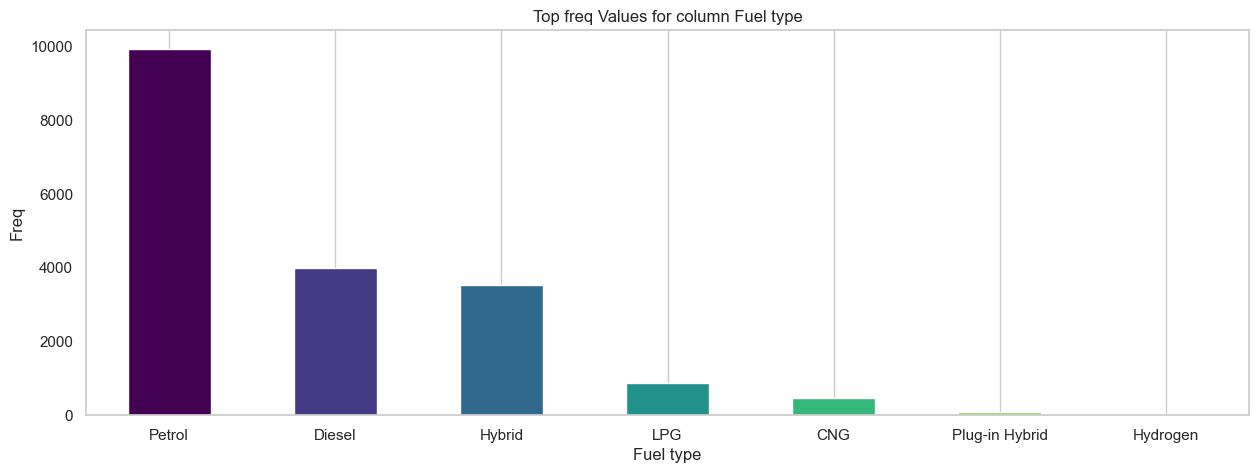

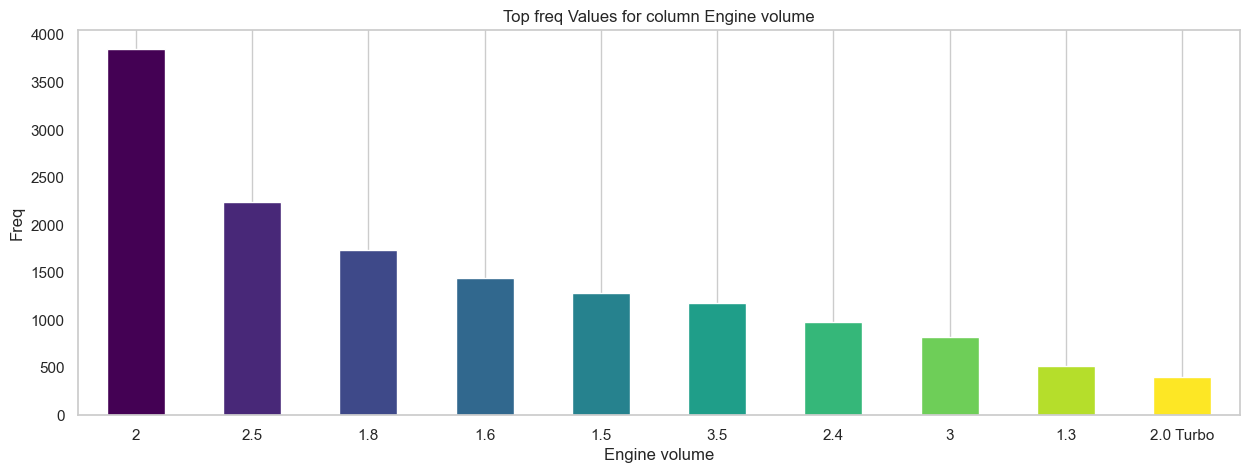

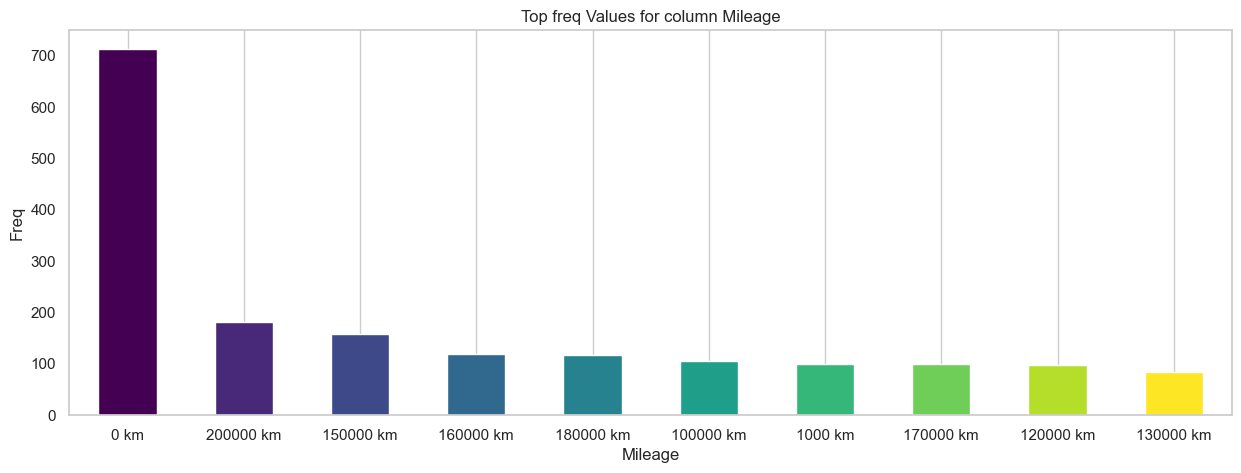

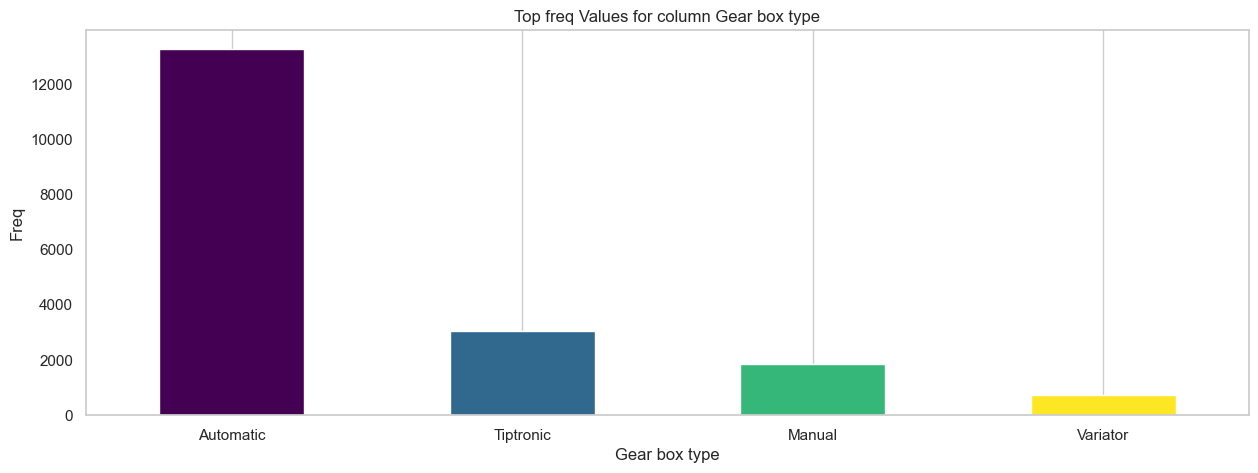

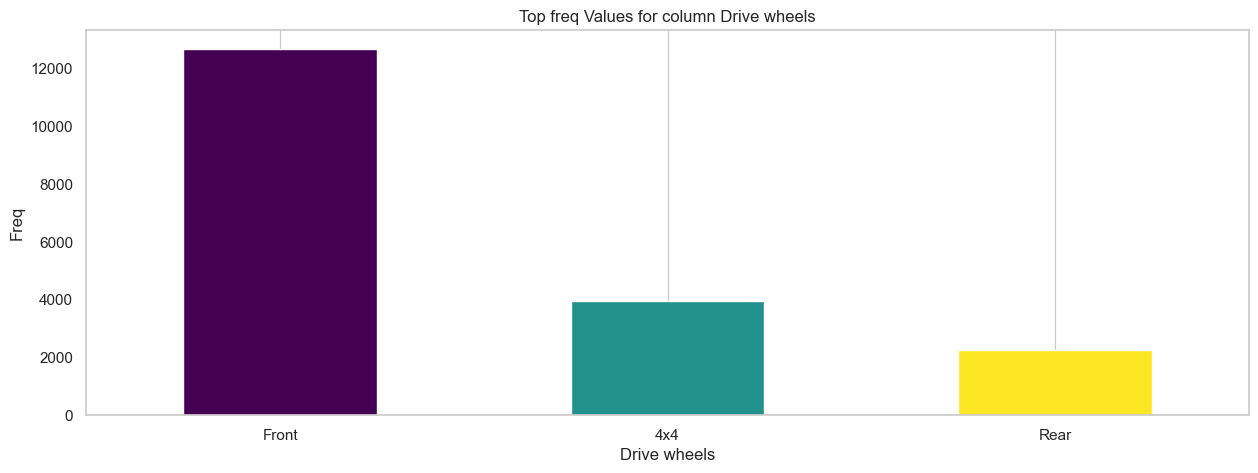

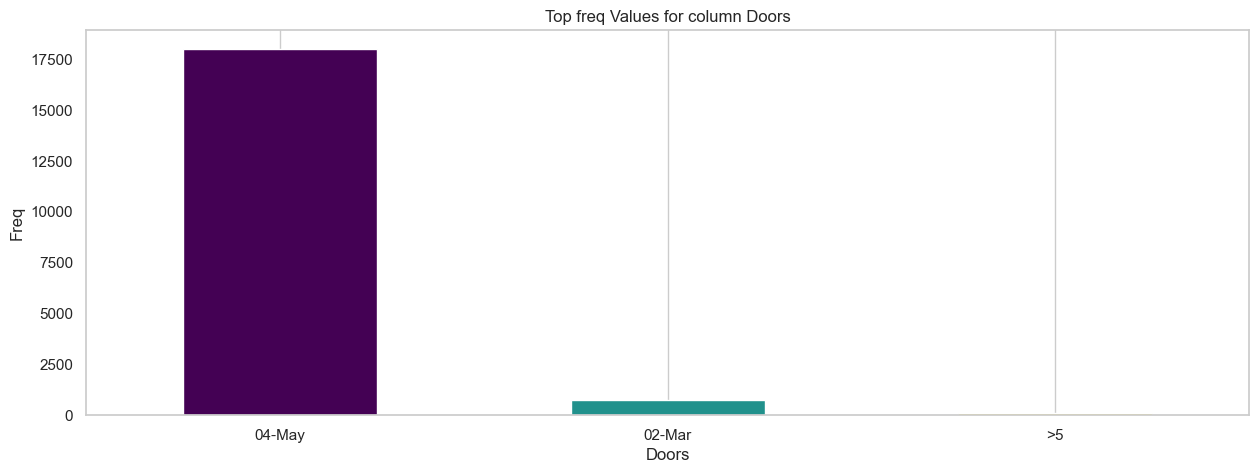

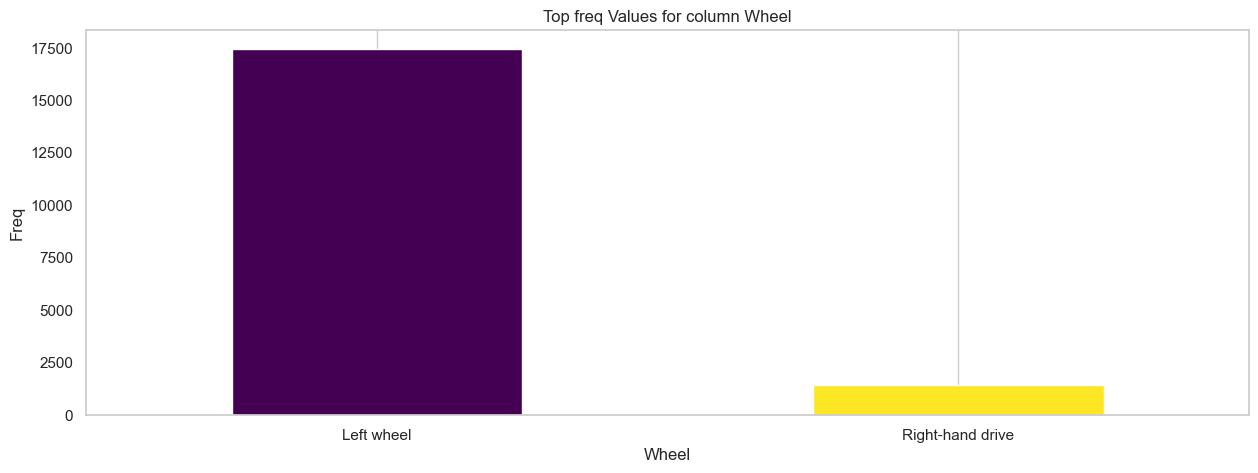

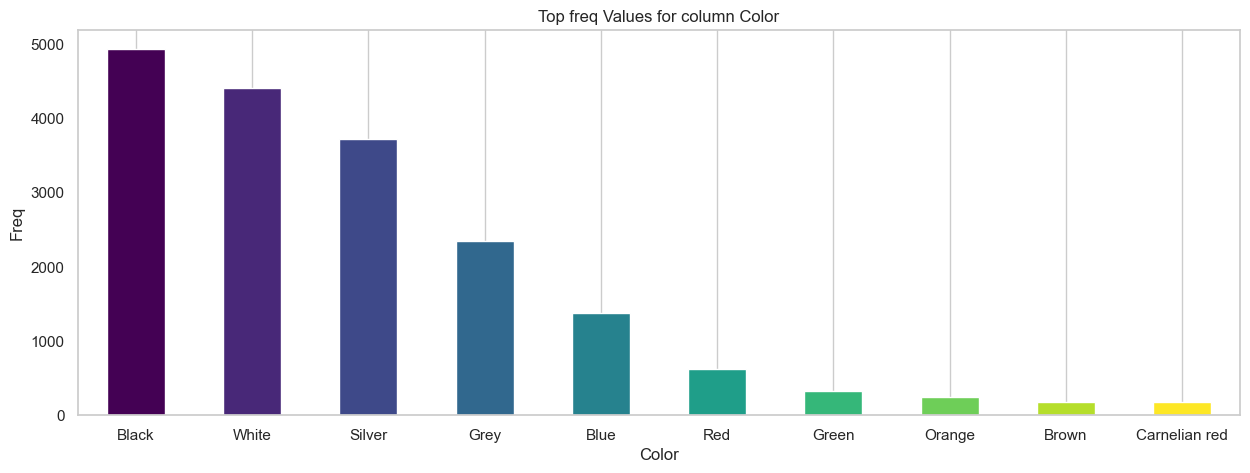

In [28]:
# for loop to plot 
for col in data_object:
    plt.figure(figsize=(15, 5))
    top10=df_price[col].value_counts()[:10]
    
    colors= cmap(np.linspace(0,1,len(top10)))
    top10.plot(kind='bar',color = colors)
    plt.title(f"Top freq Values for column {col}")
    plt.xlabel(col)
    plt.ylabel("Freq")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

### Data preprocessing

In [29]:
#check general for dataset
df_price.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [30]:
#drop columns "Doors"
df_price.drop(['Doors'],axis=1,inplace=True)

###### will create new columns depen on column "Prod. year" will calculate age each car


In [31]:
#get date
d_time=datetime.datetime.now()

In [32]:
#new column
df_price['Age']=d_time.year-df_price['Prod. year']

In [33]:
#show new colmn
df_price.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [34]:
# drop old column "Prod. year"
df_price.drop(['Prod. year'],axis=1 ,inplace=True)

###### now will check column "Levy"

In [35]:
# check data
df_price[['Levy']].sample(10)

,Levy
3239,753
2711,-
7079,586
1545,1111
10016,707
8567,-
2071,-
10395,2297
12818,-
4503,639


In [36]:
#there are exist '-' in value will replace it  with 0
df_price['Levy'].replace({'-':"0"},inplace=True)

In [37]:
# re check data
df_price[['Levy']].sample(10)

,Levy
7856,0
17540,528
1637,0
4677,585
14039,586
8900,1185
10150,0
15110,502
16791,831
6560,1811


In [38]:
#and now will convert datayoe to int
df_price['Levy']=df_price['Levy'].astype(int)

In [39]:
#dtype for "Levy"
df_price['Levy'].dtype

dtype('int32')

###### column Mileage

In [43]:
df_price[['Mileage']].head()

,Mileage
0,186005 km
1,192000 km
2,200000 km
3,168966 km
4,91901 km


In [47]:
# will delet it 'km' will just use numbers Mill without "KM"
df_price['Mileage']=df_price['Mileage'].str.replace("km","")

In [48]:
#  will convert datatyoe to int
df_price['Mileage']=df_price['Mileage'].astype(int)

In [52]:
#check 
df_price[['Mileage']].sample(5)

,Mileage
18027,20000
17649,138000
640,547288
8431,258942
16151,206608


###### columns Engine volume

In [55]:
df_price[['Engine volume']].sample(5)

,Engine volume
1965,3.5
17121,2
10069,2.7 Turbo
16968,1.6
4062,1.7


there are exist numbers and number with str"Turbo"

In [56]:
df_price['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [57]:
#will deelt str "Turbo" from each value
df_price['Engine volume']=df_price['Engine volume'].str.replace("Turbo",""
                                                               )

In [58]:
#convert type to float
df_price['Engine volume']=df_price['Engine volume'].astype(float)

In [60]:
#check
df_price[['Engine volume']].head()

,Engine volume
0,3.5
1,3.0
2,1.3
3,2.5
4,1.3


###### Handling to Outlier

In [63]:
# function to remove outliers using IQR
def remove_outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    IQR=q3-q1
    
    lower=q1-IQR*1.5
    upper=q3+ IQR*1.5
    
    return df[(df[col] >= lower) & (df[col]<=upper)]


In [66]:
#get columns nnumric
columns_numric=df_price.select_dtypes(exclude='object').columns
columns_numric

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'Age'],
      dtype='object')

In [80]:
# Apply  function to dataste
for col in columns_numric:
    df_price=remove_outlier(df_price,col)

In [81]:
#check new shape after remove outlier
df_price.shape

(11799, 16)

###### Tranfroma Data

In [89]:
# get data feature numrice and object
data_object=df_price.select_dtypes(include='object')
data_numric=df_price.select_dtypes(exclude='object')

In [92]:
#label encoder to enocde data
label=LabelEncoder()

In [93]:
# Apply LabelEncoder to all categorical columns
for col in data_object.columns:
    df_price[col] = label.fit_transform(df_price[col])

In [94]:
#check data 
df_price.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
2,8467,0,16,346,3,0,4,1.3,200000,4.0,3,1,1,1,2,18
3,3607,862,12,333,4,1,2,2.5,168966,4.0,0,0,0,14,0,13
4,11726,446,16,346,3,1,4,1.3,91901,4.0,0,1,0,12,4,10
5,39493,891,17,681,4,1,1,2.0,160931,4.0,0,1,0,14,4,8
6,1803,761,43,614,3,1,2,1.8,258909,4.0,0,1,0,14,12,14


### Modeling 

In [96]:
# Split data into features and target variable
x=df_price.drop('Price',axis=1)
y=df_price['Price']

In [101]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [102]:
# Check the shapes 
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (10619, 15)
Testing set features shape: (1180, 15)
Training set target shape: (10619,)
Testing set target shape: (1180,)


In [137]:
def compare_models(X_train, X_test, y_train, y_test):
     # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor(),
        'SVR': SVR()
    }
    
    # to save rsult
    result={}
    for name ,model in models.items():
        
        model.fit(X_train,y_train)# to train model
        
        prediction=model.predict(X_test)# ro predict X_test
        
        #  metrics

        r2=r2_score(y_test,prediction)
        
        mse=mean_squared_error(y_test,prediction)
        rmse=np.sqrt(mse)
        result[name]={'R^2 Score': r2, 'Mean Squared Error': mse ,"Root MSE":rmse}
        
    result_df = pd.DataFrame(result).T
        
    return result_df
        
        
        
        
    

In [138]:
# use function to compare model
results_df = compare_models(X_train, X_test, y_train, y_test)

In [139]:
results_df

,R^2 Score,Mean Squared Error,Root MSE
Linear Regression,0.241510,9.439613e+07,9715.767121
Decision Tree,0.542441,5.694438e+07,7546.150257
Random Forest,0.766784,2.902437e+07,5387.426664
Gradient Boosting,0.663331,4.189937e+07,6472.972038
XGBoost,0.747882,3.137680e+07,5601.499721
SVR,0.006187,1.236827e+08,11121.271439


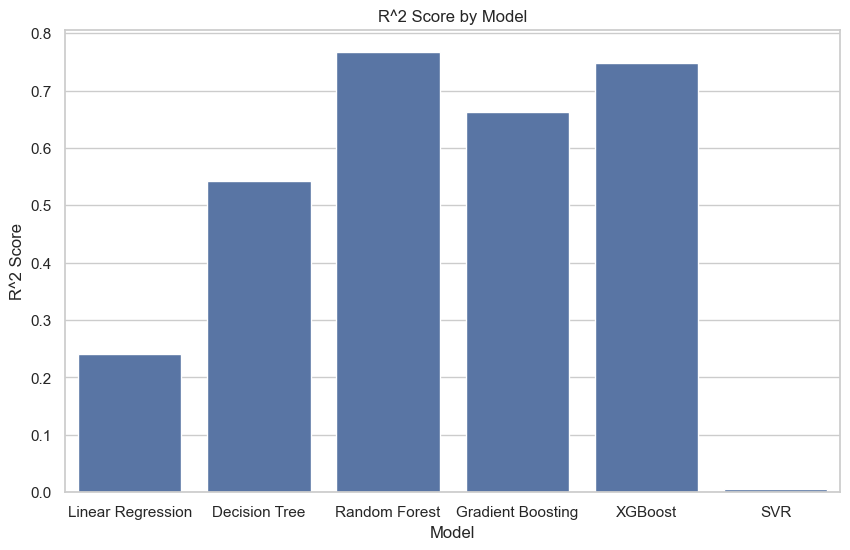

In [140]:
# Plot R^2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R^2 Score', data=results_df)
plt.title('R^2 Score by Model')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=0)
plt.show()

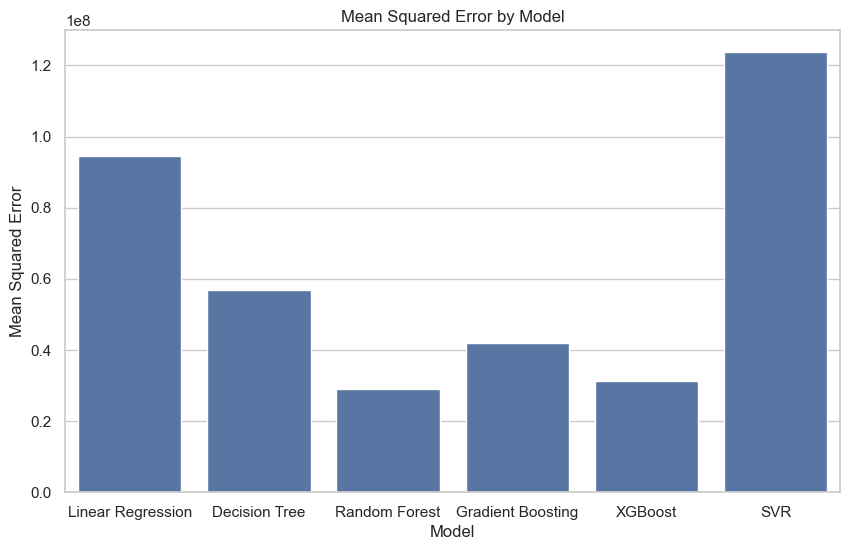

In [141]:
# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Mean Squared Error', data=results_df)
plt.title('Mean Squared Error by Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=0)
plt.show()

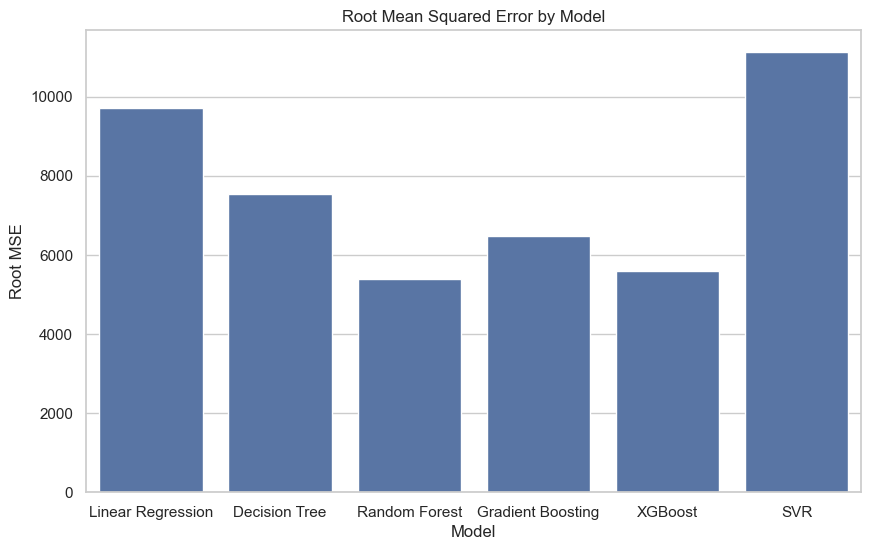

In [142]:
# Plot Root Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Root MSE', data=results_df)
plt.title('Root Mean Squared Error by Model')
plt.xlabel('Model')
plt.ylabel('Root MSE')
plt.xticks(rotation=0)
plt.show()